Date Alignment

In [1]:
import glob
import os
import pandas as pd

# Path to CSV files
csv_directory = '../data/yfinance_data/'

# Verify the directory and files
print("Directory contents:", os.listdir(csv_directory))
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))
print("CSV files found:", csv_files)

# Load and concatenate all CSV files into one DataFrame
data_frames = [pd.read_csv(file) for file in csv_files]
if not data_frames:
    raise ValueError("No data frames to concatenate.")

combined_df = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

Directory contents: ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']
CSV files found: ['../data/yfinance_data\\AAPL_historical_data.csv', '../data/yfinance_data\\AMZN_historical_data.csv', '../data/yfinance_data\\GOOG_historical_data.csv', '../data/yfinance_data\\META_historical_data.csv', '../data/yfinance_data\\MSFT_historical_data.csv', '../data/yfinance_data\\NVDA_historical_data.csv', '../data/yfinance_data\\TSLA_historical_data.csv']
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18

In [2]:
# Load and concatenate all CSV files into one DataFrame
data_frames = [pd.read_csv(file) for file in csv_files]
if not data_frames:
    raise ValueError("No data frames to concatenate.")

combined_df = pd.concat(data_frames, ignore_index=True)

# Display the column names 
print("Columns in combined_df:", combined_df.columns)

# Convert 'Date' column to datetime format
if 'Date' in combined_df.columns:
    combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')  # Use errors='coerce' to handle any invalid date formats
    combined_df.set_index('Date', inplace=True)
else:
    print("Column 'Date' not found in the DataFrame.")

# Display the DataFrame structure to confirm it is ready for TA-Lib
print(combined_df.head())

Columns in combined_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

# Load the data
data = pd.read_csv("../data/raw_analyst_ratings.csv")

# Try converting 'date' column to datetime format
try:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
except Exception as e:
    print("Error converting date:", e)

# Check for any conversion issues
if data['date'].isna().any():
    print("Some dates could not be converted.")

# Set 'date' as the index for the news DataFrame
data.set_index('date', inplace=True)

# Display the first few rows to verify
print(data.head())


Some dates could not be converted.
                           Unnamed: 0  \
date                                    
2020-06-05 10:30:54-04:00           0   
2020-06-03 10:45:20-04:00           1   
2020-05-26 04:30:07-04:00           2   
2020-05-22 12:45:06-04:00           3   
2020-05-22 11:38:59-04:00           4   

                                                                    headline  \
date                                                                           
2020-06-05 10:30:54-04:00            Stocks That Hit 52-Week Highs On Friday   
2020-06-03 10:45:20-04:00         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26 04:30:07-04:00                      71 Biggest Movers From Friday   
2020-05-22 12:45:06-04:00       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22 11:38:59-04:00  B of A Securities Maintains Neutral on Agilent...   

                                                                         url  \
date                                

In [7]:
# Remove rows with NaT values in the index
data = data.loc[~data.index.to_series().isna()]


In [8]:
# Check for duplicate dates in the news DataFrame
duplicates = data.index.duplicated()
if duplicates.any():
    print("Duplicate dates found:")
    print(data.index[duplicates])

Duplicate dates found:
DatetimeIndex(['2020-06-05 10:30:54', '2020-06-05 10:30:54',
               '2020-06-03 10:45:20', '2020-03-16 11:51:23',
               '2020-03-12 12:10:12', '2020-03-16 11:51:23',
               '2020-03-12 12:10:12', '2020-05-14 14:25:39',
               '2020-05-13 11:51:22', '2020-05-13 12:49:41',
               ...
               '2020-05-05 12:44:19', '2020-06-05 07:24:15',
               '2020-06-05 05:52:56', '2020-06-05 04:45:16',
               '2020-06-04 04:47:06', '2020-05-27 13:00:58',
               '2020-05-21 10:24:22', '2020-04-13 10:01:37',
               '2018-01-05 11:52:01', '2018-01-05 11:47:36'],
              dtype='datetime64[ns]', name='date', length=19976, freq=None)


In [9]:
# Drop duplicate dates, keeping the first occurrence
data = data[~data.index.duplicated(keep='first')]

In [10]:
# Check if the index is monotonic increasing
is_monotonic = data.index.is_monotonic_increasing
print(f"Index is monotonic increasing: {is_monotonic}")

# Check if the index is monotonic decreasing
is_monotonic = data.index.is_monotonic_decreasing
print(f"Index is monotonic decreasing: {is_monotonic}")

Index is monotonic increasing: False
Index is monotonic decreasing: False


In [11]:
# Sort the index of both DataFrames
combined_df = combined_df.sort_index()
data = data.sort_index()

print(data.index.is_monotonic_increasing)


True


In [12]:
# Reindex news data to match the dates in the stock data (combined_df)
data = data.reindex(combined_df.index, method='nearest')

# Forward fill or backward fill any missing dates in the news data
data.fillna(method='ffill', inplace=True)
# Join the stock data (combined_df) with the news data on the Date index
merged_df = combined_df.join(data, how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  Unnamed: 0  \
Date                                              
1980-12-12        0.0           0.0      357064   
1980-12-15        0.0           0.0      357064   
1980-12-16        0.0           0.0      357064   
1980-12-17        0.0           0.0      357064   
1980-12-18        0.0           0.0      357064   

                                                     headline  \
Date                                        

C:\Users\neimn\AppData\Local\Temp\ipykernel_9668\2324240017.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45428 entries, 1980-12-12 to 2024-07-30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45428 non-null  int64 
 1   headline    45428 non-null  object
 2   url         45428 non-null  object
 3   publisher   45428 non-null  object
 4   stock       45428 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241404 entries, 1980-12-12 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Open          241404 non-null  float64
 1   High          241404 non-null  float64
 2   Low           241404 non-null  float64
 3   Close         241404 non-null  float64
 4   Adj Close     241404 non-null  float64
 5   Volume        241404 non-null  int64  
 6   Dividends     241404 non-null  float64
 7   Stock Splits  241404 non-null  float64
 8   Unnamed: 0    241404 non-null  int64  
 9   headline      241404 non-null  object 
 10  url           241404 non-null  object 
 11  publisher     241404 non-null  object 
 12  stock         241404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 25.8+ MB


Sentiment Analysis

In [17]:

from textblob import TextBlob
# Perform sentiment analysis
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the headlines
merged_df['Sentiment_Score'] = merged_df['headline'].apply(get_sentiment_score)

# Verify that the new column is added
print(merged_df[['headline', 'Sentiment_Score']].head())

                                                     headline  Sentiment_Score
Date                                                                          
1980-12-12  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)              0.0
1980-12-15  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)              0.0
1980-12-16  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)              0.0
1980-12-17  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)              0.0
1980-12-18  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)              0.0


C:\Users\neimn\AppData\Local\Temp\ipykernel_9668\1455216251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


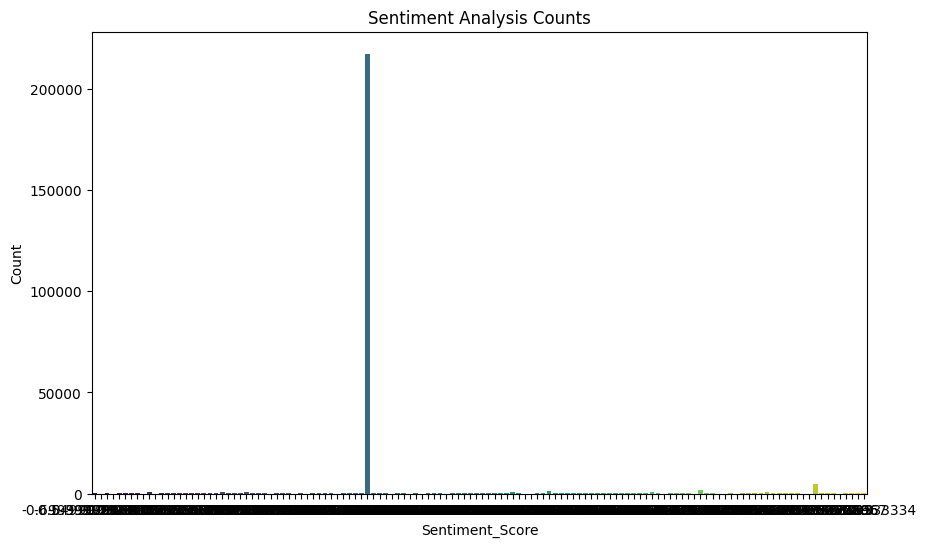

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the occurrences of each sentiment
sentiment_counts = merged_df['Sentiment_Score'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add titles and labels
plt.title('Sentiment Analysis Counts')
plt.xlabel('Sentiment_Score')
plt.ylabel('Count')

# Display the plot
plt.show()

Calculate Daily Stock Returns

In [19]:
# Calculate daily stock returns
merged_df['Daily_Return'] = merged_df['Close'].pct_change()

# Display the first few rows to check the daily return column
print(merged_df[['Close', 'Daily_Return']].head())

               Close  Daily_Return
Date                              
1980-12-12  0.128348           NaN
1980-12-15  0.121652     -0.052171
1980-12-16  0.112723     -0.073398
1980-12-17  0.115513      0.024751
1980-12-18  0.118862      0.028992


Correlation Analysis

In [20]:
# Correlate sentiment scores with daily stock returns
correlation = merged_df['Sentiment_Score'].corr(merged_df['Daily_Return'])

print(f"Correlation between sentiment scores and daily stock returns: {correlation}")

Correlation between sentiment scores and daily stock returns: -0.00392406324039479
